<a href="https://colab.research.google.com/github/alorthius/LA-compendium/blob/master/labs/lab_1/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

## Intro

1. Submit this task as a link to Google Colab (https://colab.research.google.com/notebooks/intro.ipynb#). Make sure you made a copy of this notebook and opened it via UCU domain.

2. Please use cv2 standard methods for reading and resizing image, and matplotlib or cv2 imshow function for displaying.

3. Form teams of 2-3 people and make only one submission per team. Mention all teammates in the name of the notebook.

4. Your final grade will be a product of grade for the coding and explanatory part and coefficient for the oral defense (to be scheduled later).

Team:

Mykhailo-Taras Sobko

Anna-Alina Bondarets

Mykhailo Bondarenko

## 1.

Recall that a linear transformation is a mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ such that
$\forall c_1, c_2 \in \mathbb{R}, \mathbf{u}_1, \mathbf{u}_2 \in \mathbb{R}^n$  
$T(c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2) = c_1T(\mathbf{u}_1) + c_2T(\mathbf{u}_2)$.  

In this lab you will study some of the common transformations in $\mathbb{R}^2$, derive their general matrix form, explain what a resulting image will look like and apply transformations to the vectors and pictures.

Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$, but retaining the color. However, the image is usually represented as an array of pixels, thus having dimensions (image height, image width, 3) if color is represented in RGB system. You can use *warpAffine()* function from cv2 or implement a function that manipulates pixel's position given an array of pixels and a transformation matrix yourself.

### 1.1 Image preparation

Load the first image, resize it to more convenient size and examine its representation.

The shape of the image is (500, 500, 3)


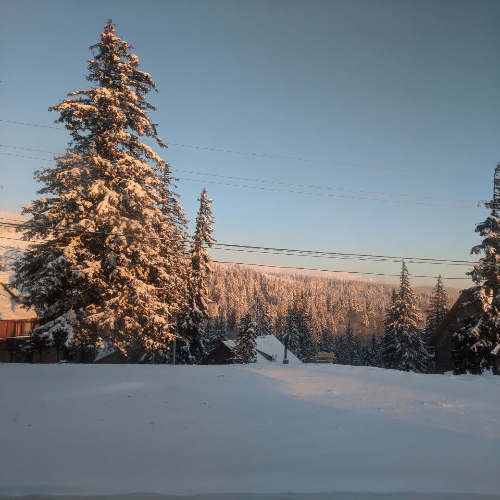

In [ ]:
# Load images

##### YOUR CODE STARTS #####

img1_path = 'img1.jpg'
image = cv.imread(img1_path)
resized = cv.resize(image, (500,500))

print(f"The shape of the image is {resized.shape}")
cv2_imshow(resized)

##### YOUR CODE ENDS ##### 

 What is its shape? What do the values mean?

The shape is a tuple of the number of rows, columns, and channels (if the image is color, e.g. for the grayscale image, the shape will consist only of the numbers of rows and columns). Each pixel in the image has its unique row and column coordinate

### 1.2 Rotation matrix

Rotation is a linear transformation that preseves at least one point. An example of rotation by angle $\psi$ on xy-plane is depicted in the image below:   
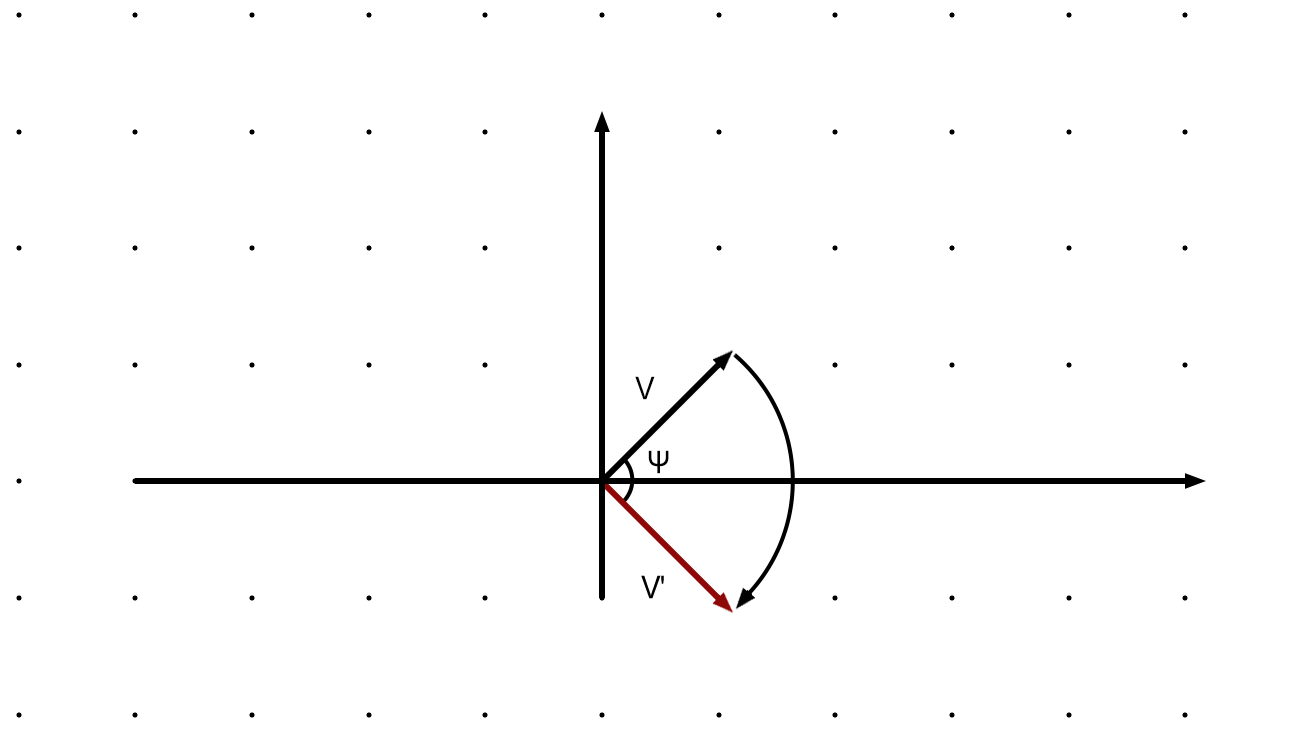

What is the rotation matrix by a generic angle $\phi$?

A rotation matrix is a transformation matrix which rotates points in the Euclidean space:
$$
R =
\begin{bmatrix}
\cos{\phi} & - \sin{\phi} \\
\sin{\phi} & \cos{\phi}
\end{bmatrix}
$$
The matrix $R$ rotates points in the $xy$ plane counterwise through an ange $\phi$.

To perform the rotation on a plane point with cordinates $P = (x, y)$, we multiply matrix $R$ by the point coordinates written as a column vector:

$$
R \cdot P =
\begin{bmatrix}
\cos{\phi} & - \sin{\phi} \\
\sin{\phi} & \cos{\phi}
\end{bmatrix} = 
\begin{bmatrix}
x \cos{\phi} - y \sin{\phi} \\
x \sin{\phi} + y \cos{\phi}
\end{bmatrix}
$$

Implement a function that calculates rotation matrix and apply it to the vector and the image to rotate them by $45^\circ$.

In [ ]:
# Create rotation matrix

def get_rotation_matrix(phi):
  ##### YOUR CODE STARTS #####
  
  ##### YOUR CODE ENDS ##### 
  return np.array([ [np.cos(phi), -np.sin(phi)],
                    [np.sin(phi),  np.cos(phi)] ])

phi = 45
M = get_rotation_matrix(phi)
print("Rotation matrix is")
print(M)

Rotation matrix is
[[ 0.52532199 -0.85090352]
 [ 0.85090352  0.52532199]]


Firstly we'll apply rotation to the vector. Let's check what our vector looks like now:

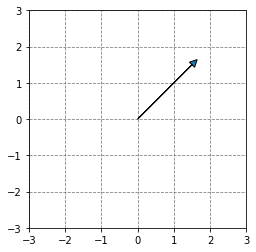

In [ ]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

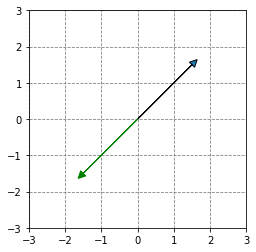

In [ ]:
# Apply rotation to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

angle = 135.1
R = get_rotation_matrix(angle)
B2 = np.matmul(R, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

You can also rotate the images! Check how you can do it below:

`worpAffine` function from `cv2` library in order to perform a 2D image rotation should receive a rotation matrix $R$ in the following form:

$$
R = \begin{bmatrix}
\alpha & \beta & (1 - \alpha) \cdot cx - \beta \cdot cy \\
- \beta & \alpha & \beta \cdot cx + (1 - \alpha) \cdot cy
\end{bmatrix}, where: \\
\alpha = \cos{\phi}, \\
\beta = \sin{\phi}, \\
cx = center\ by\ x, \\
cy = center\ by\ y
$$

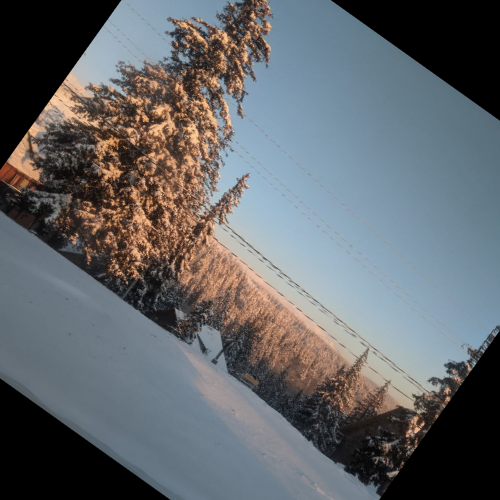

In [ ]:
##### YOUR CODE STARTS #####
angle = -120
R = get_rotation_matrix(angle)
cx = resized.shape[0] // 2
cy = resized.shape[1] // 2

alpha = R[0][0]
beta =  R[1][0]

M = np.array([[ alpha, beta,  (1 - alpha) * cx - beta * cy ],
              [ -beta, alpha, beta * cx + (1 - alpha) * cy ]])

rotated = cv.warpAffine(
    resized, M, resized.shape[:2], flags = cv.INTER_LINEAR,
    borderMode = cv.BORDER_CONSTANT
  )
##### YOUR CODE ENDS #####

cv2_imshow(rotated)

### 1.3 Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis (they don't have to be equal). On the picture v' represents vector v scaled by a factor (0.5, 1) and v'' - by (0.5, 0.5).
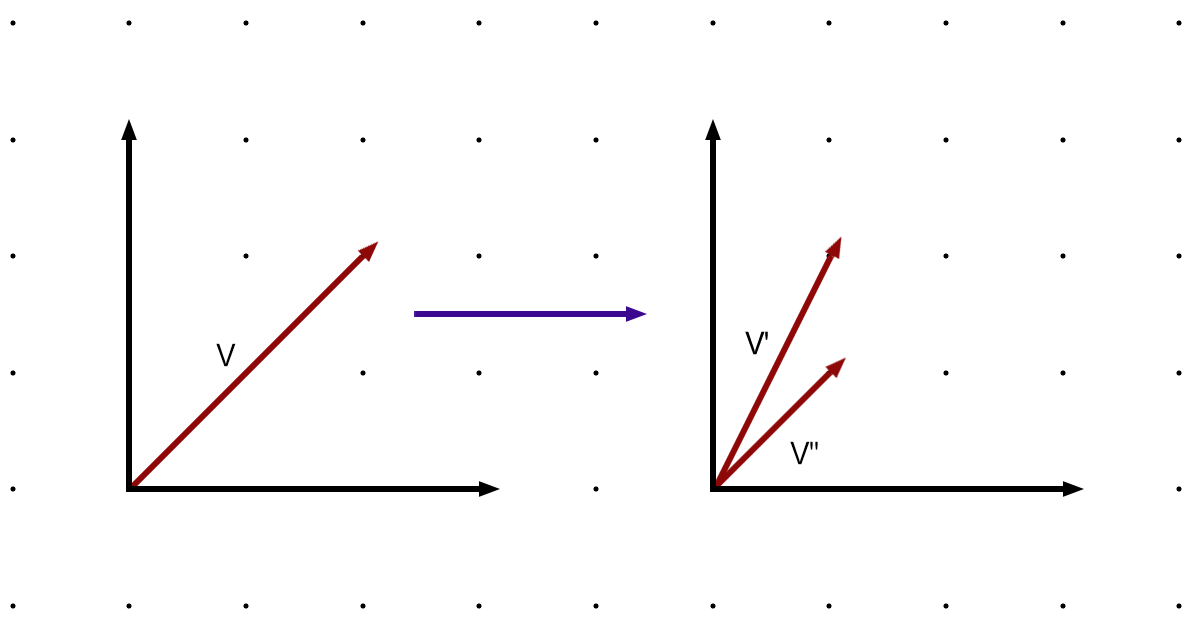

Derive a general form for a scaling matrix and apply scaling by a factor of (1, 0.5) to the vector and the image.

$\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} x_s x \\ y_s y \end{bmatrix} = \begin{bmatrix} x_s & 0 \\ 0 & y_s \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$

In [ ]:
##### YOUR CODE STARTS #####
def get_scaling_matrix(scale_factor_x, scale_factor_y):
  return np.float64([[scale_factor_x, 0],
                     [0, scale_factor_y]])

M2 = get_scaling_matrix(1, 0.5)

##### YOUR CODE ENDS #####
print("Scaling matrix is")
print(M2)

Scaling matrix is
[[1.  0. ]
 [0.  0.5]]


Apply scaling to the vector.

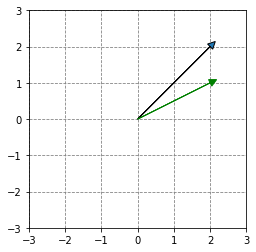

In [ ]:
# Apply scaling to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([2, 2])
M2 = get_scaling_matrix(1, 0.5)
B2 = np.matmul(M2, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Now apply scaling to the image:

Affine matrix: $\begin{bmatrix} x_s & 0 & (1 - x_s)x_c \\ 0 & y_s & (1 - y_s)y_c \end{bmatrix}$ (the last column preserves the center of the image)

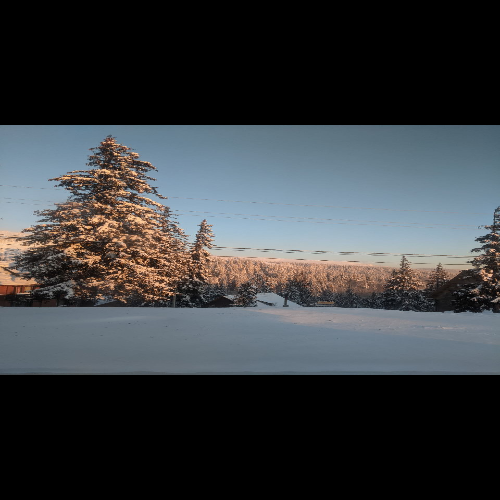

In [ ]:
##### YOUR CODE STARTS #####
AFFINE_M2 = np.column_stack((M2, np.array([0, 125]).T))
scaled = cv.warpAffine(resized, AFFINE_M2, resized.shape[:2], flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####
cv2_imshow(scaled)

### 1.4 Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengthes of line segments.

Build a shearing matrix; find a transformation matrix that moves point $(x, y)$ to $(x+1.5y, y)$ and apply it to the vector and the image. 

A shear parallel to the $x$ axis:
$$
\begin{bmatrix} x' \\ y' \end{bmatrix} =
\begin{bmatrix} 1 & \lambda \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}
$$

A shear parallel to the $y$ axis:
$$
\begin{bmatrix} x' \\ y' \end{bmatrix} =
\begin{bmatrix} 1 & 0 \\ \lambda & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}
$$

In [ ]:
##### YOUR CODE STARTS #####
def get_horizontal_shear_matrix(factor):  # horizontal = parallel to the x axis
  return np.array([ [1, factor],
                    [0,   1   ] ])

M3 = get_horizontal_shear_matrix(2)
##### YOUR CODE ENDS #####
print("Shearing matrix is")
print(M3)

Shearing matrix is
[[1 2]
 [0 1]]


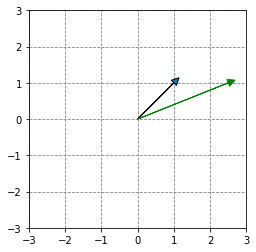

In [ ]:
# Apply shearing to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])

B1 = np.array([1, 1])
S = get_horizontal_shear_matrix(1.5)

B2 = np.matmul(S, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

A shear matrix needed for the `warpPerspective` function:
$$
M = \begin{bmatrix} 1 & \lambda & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
$$

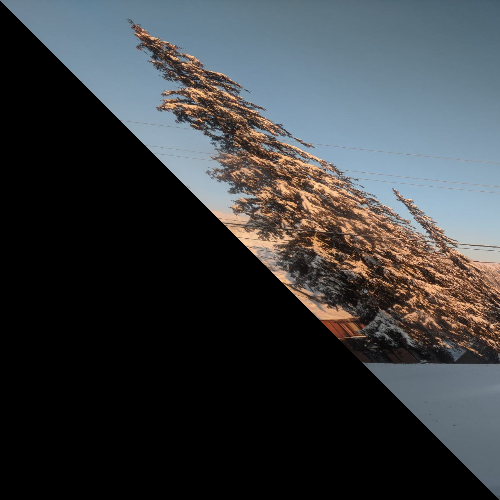

In [ ]:
##### YOUR CODE STARTS #####
S = get_horizontal_shear_matrix(1)
M = np.float32([ [S[0][0], S[0][1], 0],
                 [S[1][0], S[1][1], 0],
                 [    0,      0,    1] ])
sheared = cv.warpPerspective(resized, M, resized.shape[:2])

##### YOUR CODE ENDS #####
cv2_imshow(sheared)

### 1.5 Translation matrix

Translation is a transformation that moves every point of a figure by fixed distance.


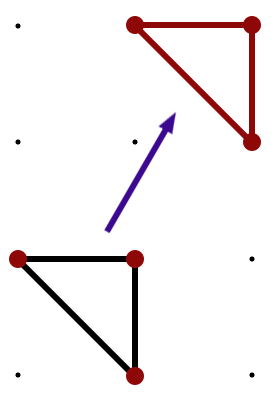

Build a translation matrix; implement a function that produces translation matrix and apply to the vector and to the image translation by (20, 25).


$$
\begin{bmatrix} x' \\ y' \end{bmatrix} =
\begin{bmatrix} c_x \\ c_y \end{bmatrix} + \begin{bmatrix} x \\ y \end{bmatrix}
$$

In [ ]:
##### YOUR CODE STARTS #####
def get_translation_matrix(translation_factor_x, translation_factor_y):
  return np.array([ translation_factor_x, translation_factor_y ])

M4 = get_translation_matrix(1, 2)
##### YOUR CODE ENDS #####
print("Translation matrix is")
print(M4)

Translation matrix is
[1 2]


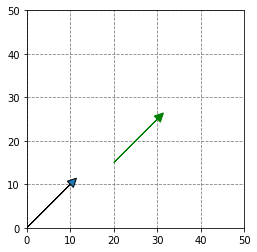

In [ ]:
# Apply translation to the vector A1B1 to achieve vector A2B2

##### YOUR CODE STARTS #####
A1 = np.array([0, 0])
B1 = np.array([10, 10])
T = get_translation_matrix(20, 15)
A2 = A1 + T
B2 = B1 + T
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A1[0], A1[1], B1[0], B1[1], head_width=2, head_length=2)
ax.arrow(A2[0], A2[1], B2[0]-A2[0], B2[1]-A2[1], head_width=2, head_length=2, color='green')
plt.ylim(0,50)
plt.xlim(0,50)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

The translation matrix needed by the `warpPersperctive` function:
$$
M = \begin{bmatrix} 1 & 0 & c_x \\ 0 & 1 & c_y \\ 0 & 0 & 1 \end{bmatrix}
$$

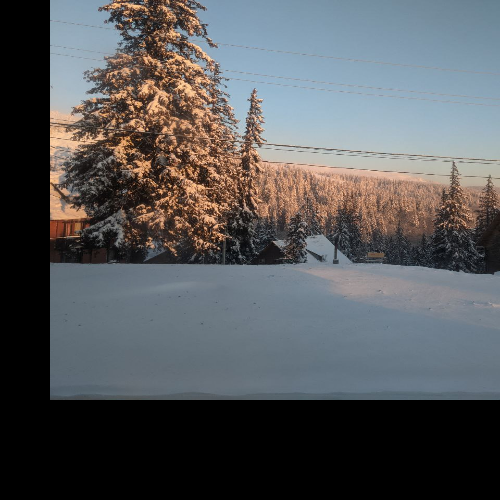

In [ ]:
##### YOUR CODE STARTS #####
T = get_translation_matrix(50, -100)
M = np.float32([ [1, 0, T[0]],
                 [0, 1, T[1]],
                 [0, 0,   1 ] ])
translated = cv.warpPerspective(resized, M, (500, 500))
##### YOUR CODE ENDS #####
cv2_imshow(translated)

### 1.6 Mirror symmetry 
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$.

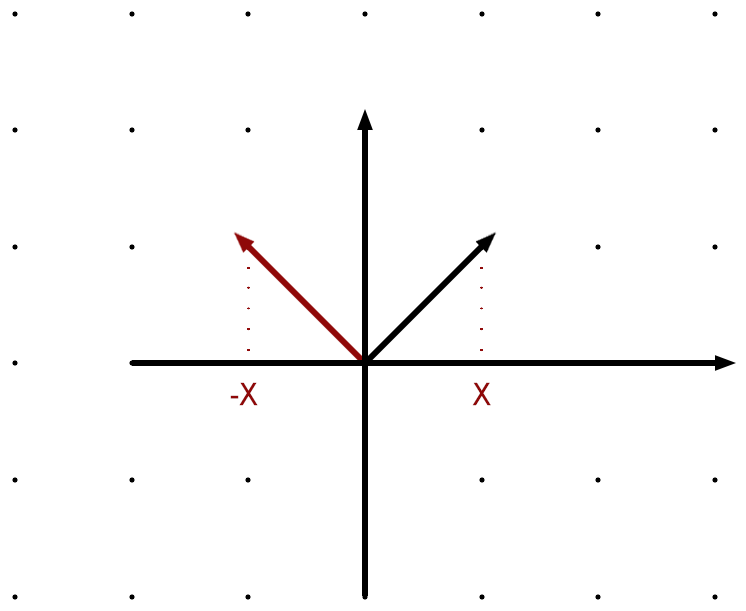

Build transformation matrix that represents vertical mirror symmetry; implement mirroring matrix in a function.

$\begin{cases} Ae_1 = -e_1 \\ Ae_2 = e_2 \end{cases} => A = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}$

In [ ]:
#### YOUR CODE STARTS #####
def get_horizontal_mirror_marix():
  return np.float64([[-1, 0],
                     [ 0, 1]])

M5 = get_horizontal_mirror_marix()
##### YOUR CODE ENDS #####
print("Mirroring matrix is")
print(M5)

Mirroring matrix is
[[-1.  0.]
 [ 0.  1.]]


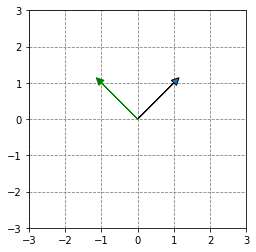

In [ ]:
# Apply mirroring to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = [0, 0]
B1 = np.array([1, 1])
M5 = get_horizontal_mirror_marix()
B2 = np.matmul(M5, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Affine matrix: $\begin{bmatrix} -1 & 0 & 2x_c \\ 0 & 1 & 0 \end{bmatrix}$ (the last column preserves the center of the image)

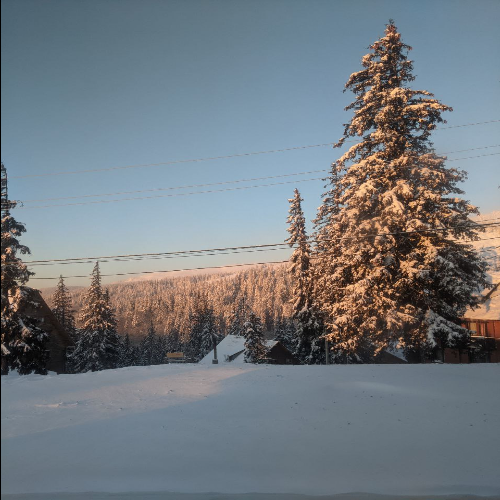

In [ ]:
##### YOUR CODE STARTS #####
AFFINE_M5 = np.column_stack((M5, np.array([500, 0]).T))
mirrored = cv.warpAffine(resized, AFFINE_M5, (500, 500), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####
cv2_imshow(mirrored)

## 2.

### 2.1 Perspective shift matrix

You will need to use img2.jpg for this task. Load and resize it in the similar manner as with img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   

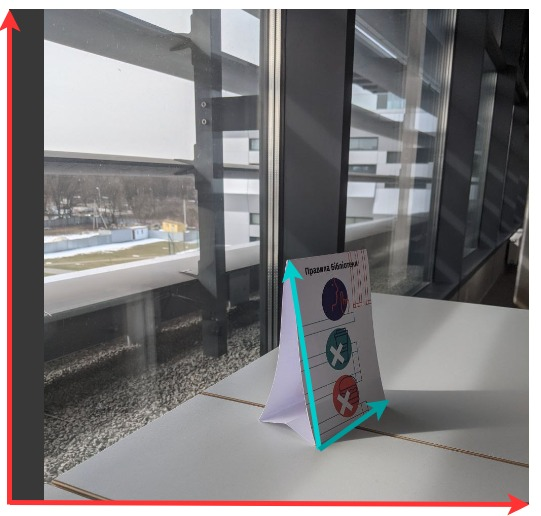

As you see on the picture above, the initial picture has a standard basis of red vectors, but we want to transform all of the vectors in the picture so that the blue vectors will become their new basis.

To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image (3 of these points should not be colinear). Transformation matrix is a 3 by 3 matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector. 

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

Find coefficients $c_{ij}$ via solving linear system containing source and destination coordinates and 9 'c' coefficients with numpy methods and apply it to an image so that the sign is clearly visible. Explain how the system was constructed.

(Hint: $c_{22} = 1$)

$$
u_i = \frac{с_{00}x_i + с_{01}y_i + с_{02}}{c_{20}x_i + с_{21}y_i + с_{22}} = \frac{a}{d}, \quad
v_i = \frac{с_{10}x_i + с_{11}y_i + с_{12}}{c_{20}x_i + с_{21}y_i + с_{22}} = \frac{b}{d}, \quad с_{22} = 1
$$
$$
G \cdot \begin{bmatrix}x \\ y \\ 1\end{bmatrix} = \begin{bmatrix}a \\ b \\ d \end{bmatrix} = \begin{bmatrix}d u_i \\ d v_i \\ d\end{bmatrix}
$$
<center>8 unknowns $\implies$ 4 points are needed</center>

$$
\begin{equation}\begin{cases}
u_i = с_{00} x_i + с_{01} y_i + с_{02} - с_{20} x_i u_i - с_{21} y_i u_i \\
u_i = с_{10} x_i + с_{11} y_i + с_{12} - с_{20} x_i v_i - с_{21} y_i v_i
\end{cases}\end{equation} \implies \\
\underbrace{\begin{bmatrix} u_1 \\ v_1 \\ u_2 \\ v_2 \\ u_3 \\ v_3 \\ u_4 \\ v_4 \end{bmatrix}}_{\color{red}{k_2}} =
\underbrace{\begin{bmatrix}
x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1 u_1 & -y_1 u_1 \\
0 & 0 & 0 & x_1 & y_1 & 1 & -x_1 v_1 & -y_1 v_1 \\
& & & & \cdots \\
x_4 & y_4 & 1 & 0 & 0 & 0 & -x_4 u_4 & -y_4 u_4 \\
0 & 0 & 0 & x_4 & y_4 & 1 & -x_4 v_4 & -y_4 v_4 \\
\end{bmatrix}}_{\color{red}{k_1}} \cdot
\underbrace{\begin{bmatrix}
с_{00} \\ с_{01} \\ с_{02} \\ с_{10} \\ с_{11} \\ с_{12} \\ с_{20} \\ с_{21} \\ с_{22}
\end{bmatrix}}_{\color{red}{с'}}
$$
<center>$\color{red}{k_2 = k_1 \cdot c'} \implies c' = k_1^{-1} \cdot k_2$</center>


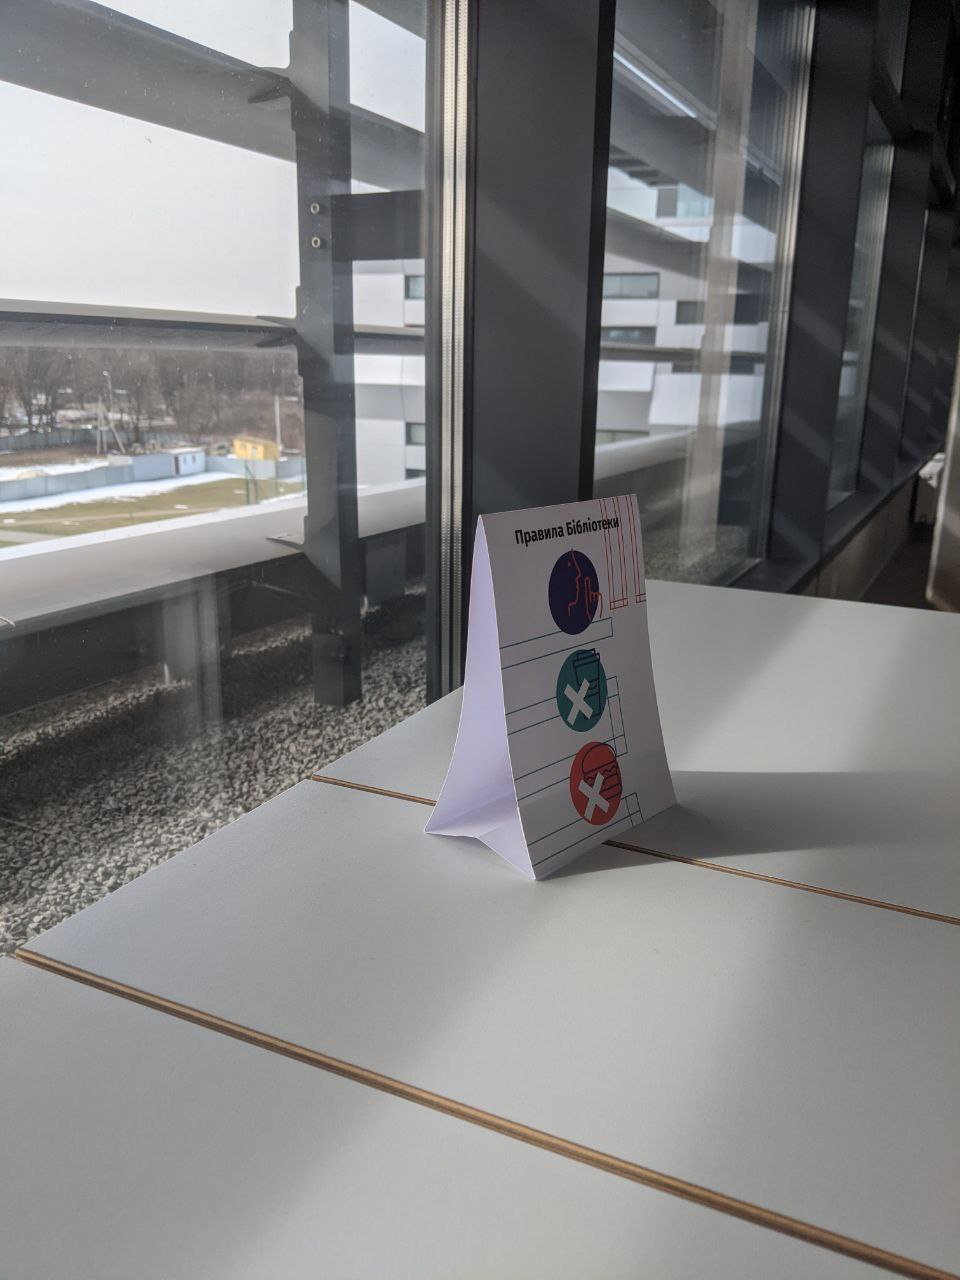

In [ ]:
##### YOUR CODE STARTS #####
img2_path = 'img2.jpg'
##### YOUR CODE ENDS #####
image2 = cv.imread(img2_path)
cv2_imshow(image2)

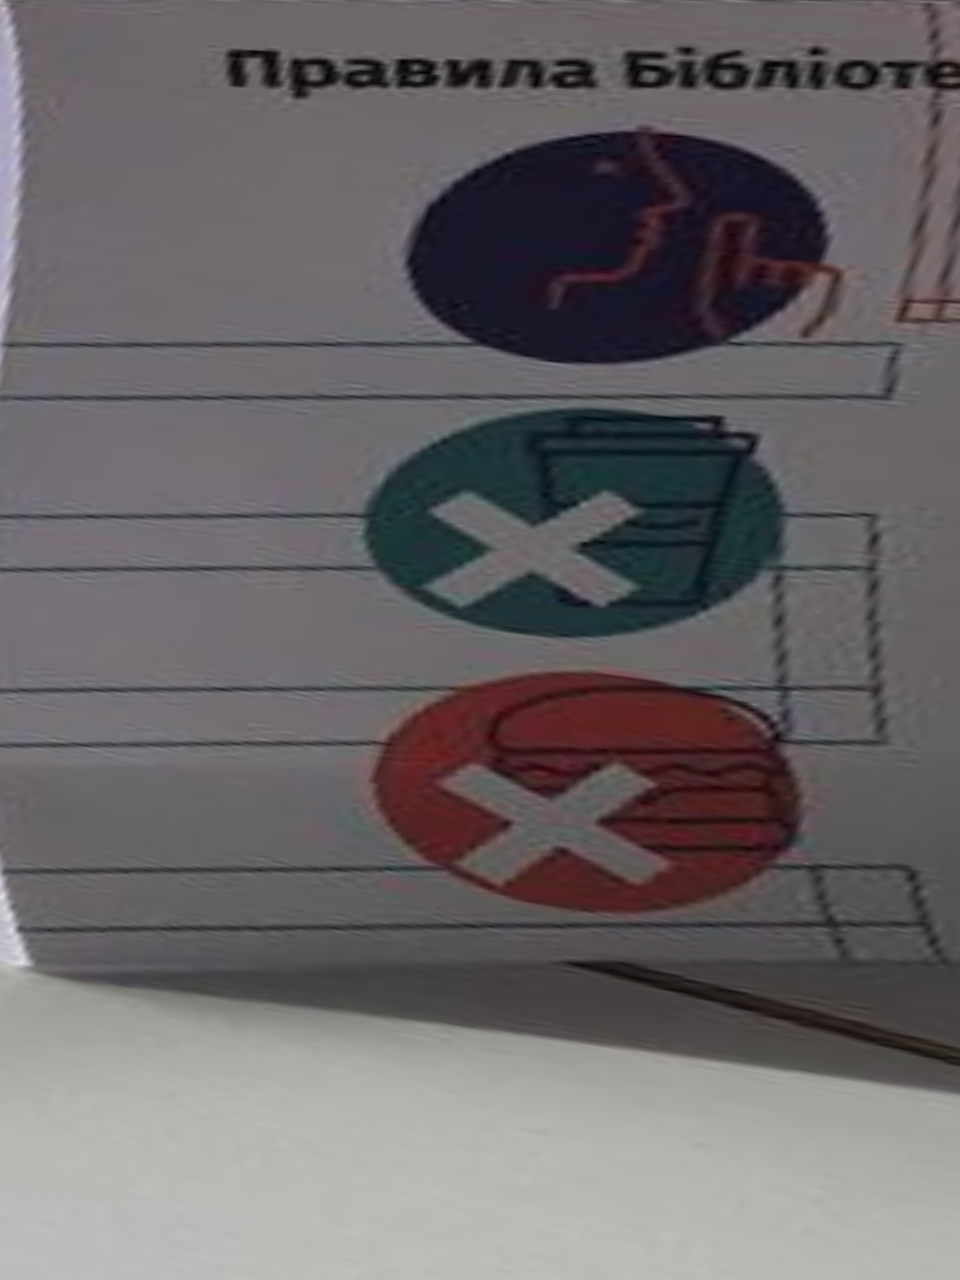

In [ ]:
##### YOUR CODE STARTS #####
from numpy.linalg import inv as mat_inv
import numpy as np
def get_perspective_transform_matrix(source, destination):
  K1 = np.zeros((8, 8))
  for i, [[x, y], [u, v]] in enumerate(zip(source[:4], destination[:4])):
    i2 = 2*i
    K1[i2, :3] = [x, y, 1]
    K1[i2+1, 3:6] = [x, y, 1]
    K1[i2, 6:] = [-x*u, -y*u]
    K1[i2+1, 6:] = [-x*v, -y*v]
  K2 = np.ndarray.flatten(destination)
  C_prime = np.linalg.solve(K1, K2) # mat_inv(K1) * K2
  C = np.array([C_prime[:3], C_prime[3:6], [C_prime[6], C_prime[7], 1]])
  return C

rows, cols, ch = image2.shape

source_points = np.float32([[531, 878], [480, 516], [677, 803], [637, 493]])
destination_points = np.float32([[0, cols-1], [0, 0], [rows-1, cols-1], [rows-1, 0]])

perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)

transformed = cv.warpPerspective(image2, perspective_shift_m, image2.shape[1::-1])
cv2_imshow(transformed)
##### YOUR CODE ENDS #####

### 2.2 Composition of transformations

Apply the following transformations in specified order to the original image  and show the results side-by-side.

1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.

---------------------------
Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)
---------------------------


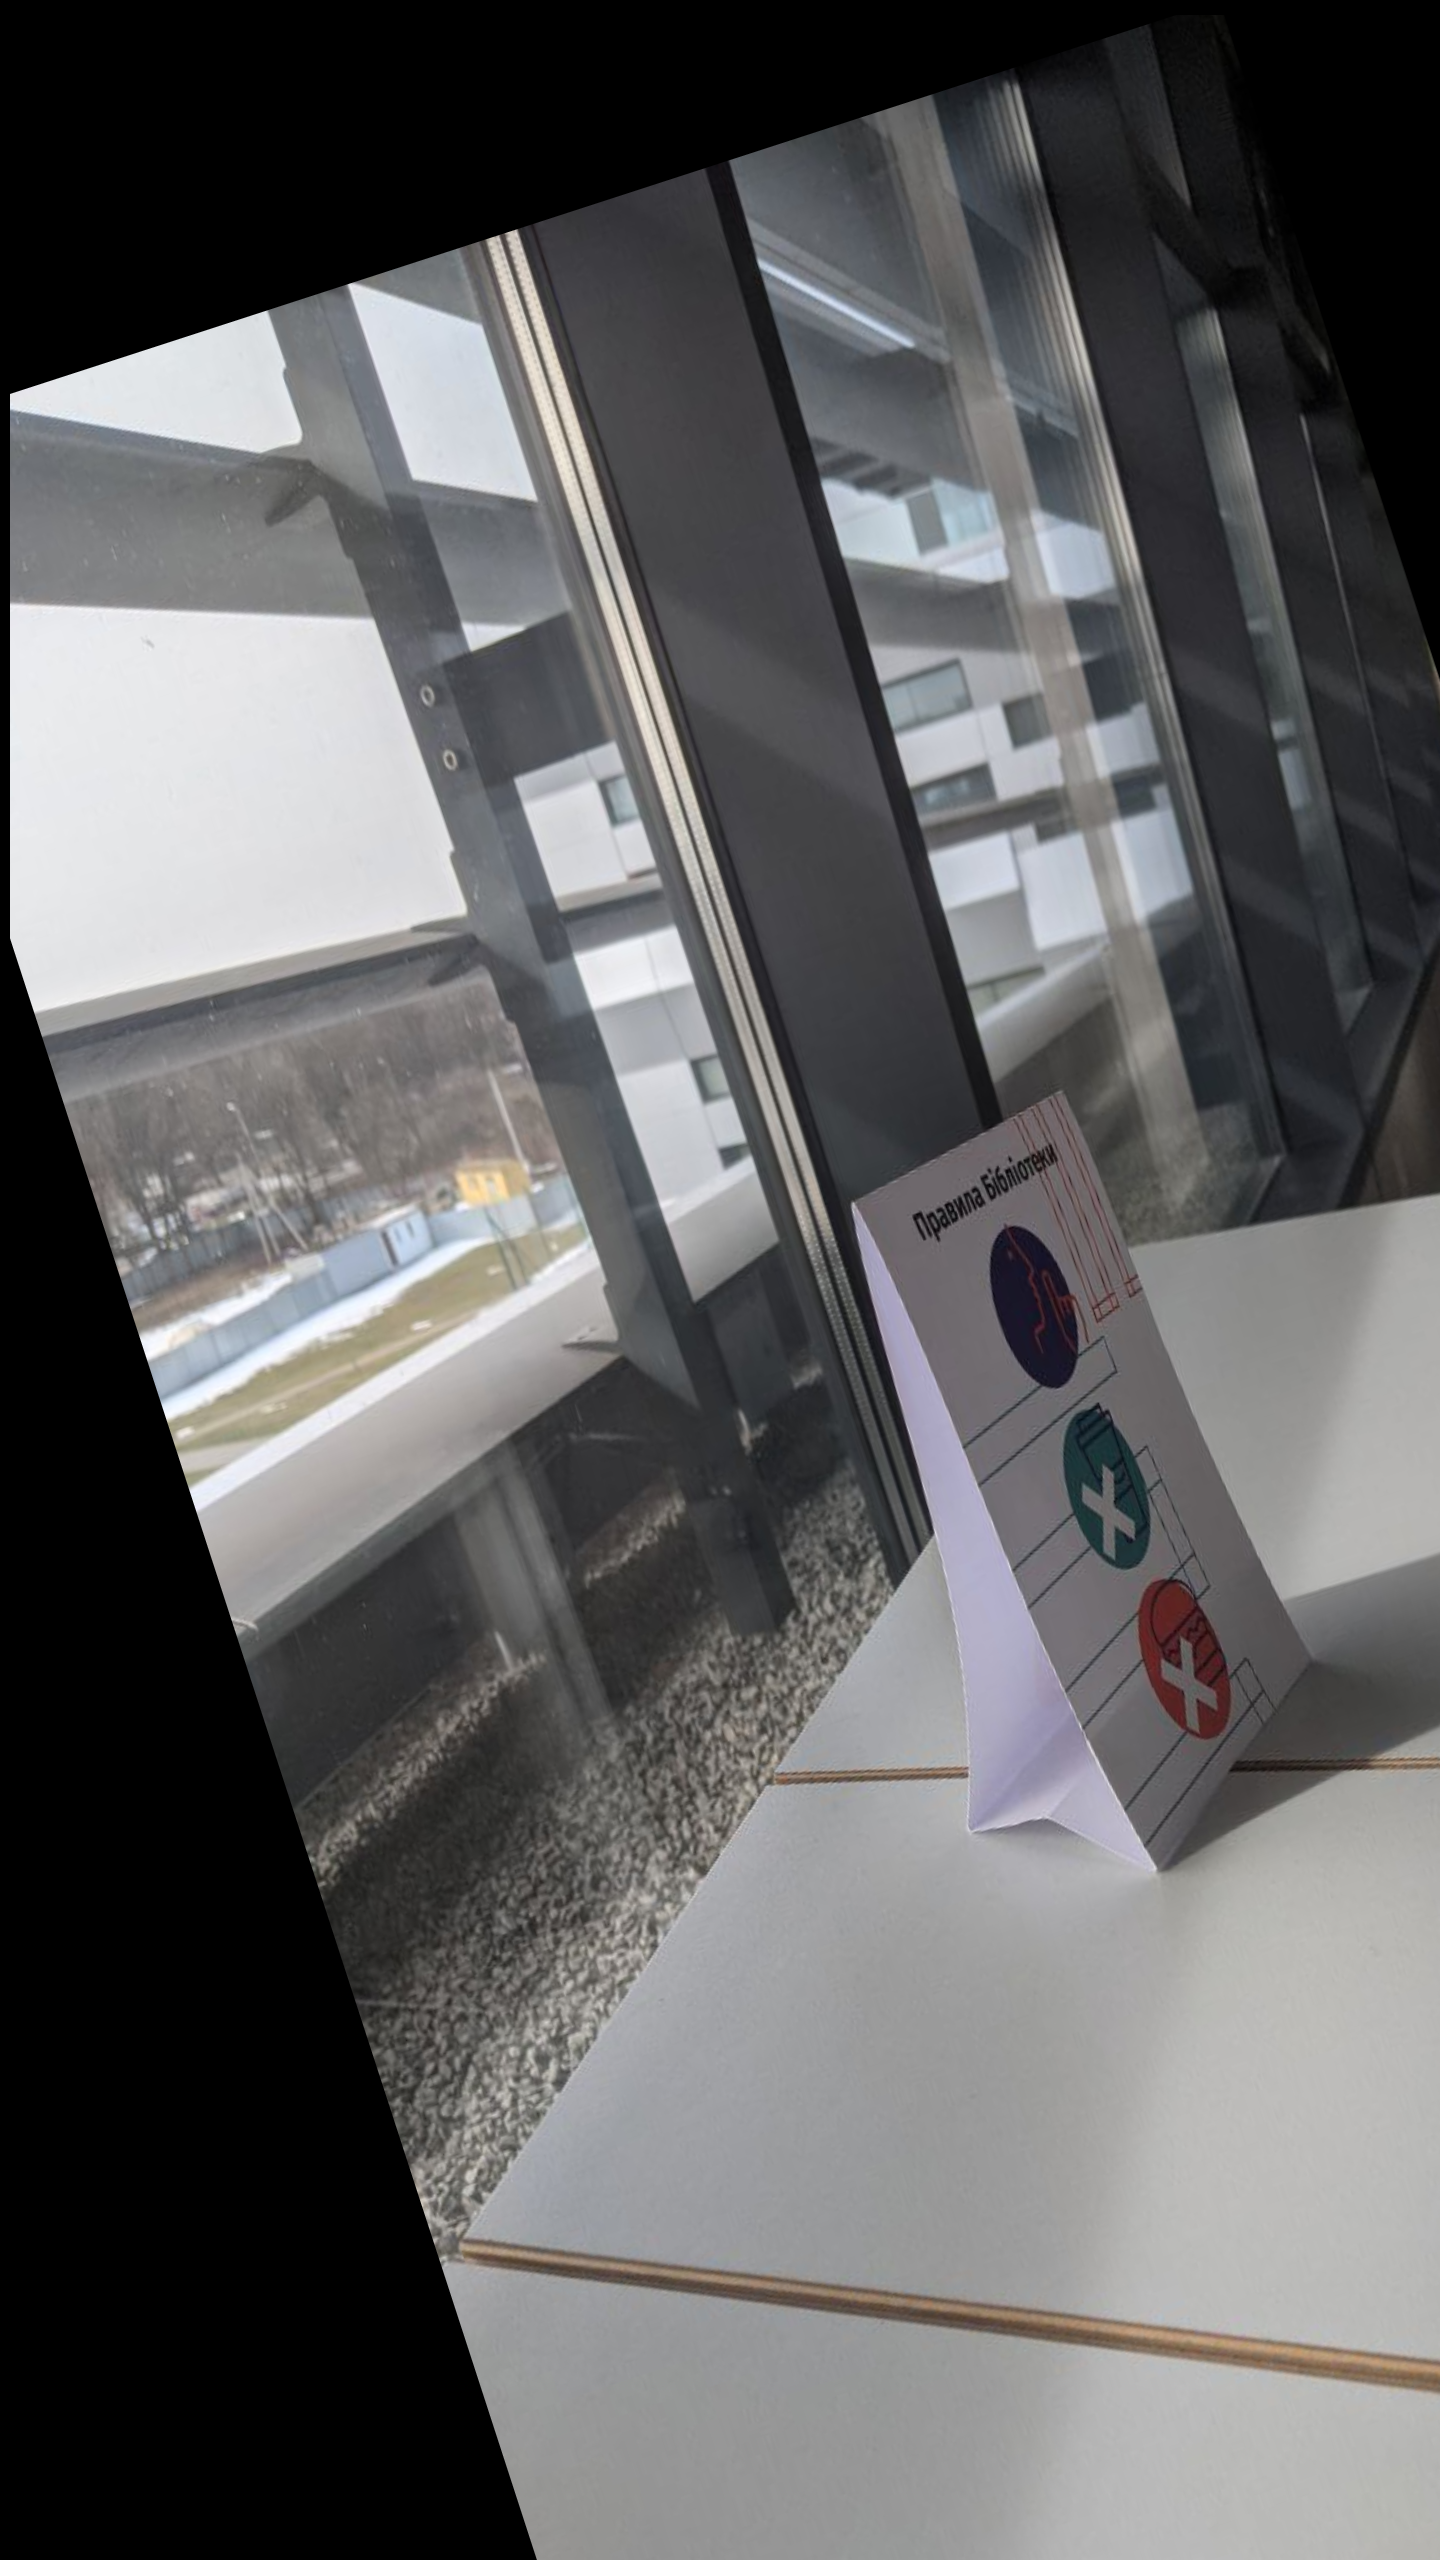

---------------------------
Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘
---------------------------


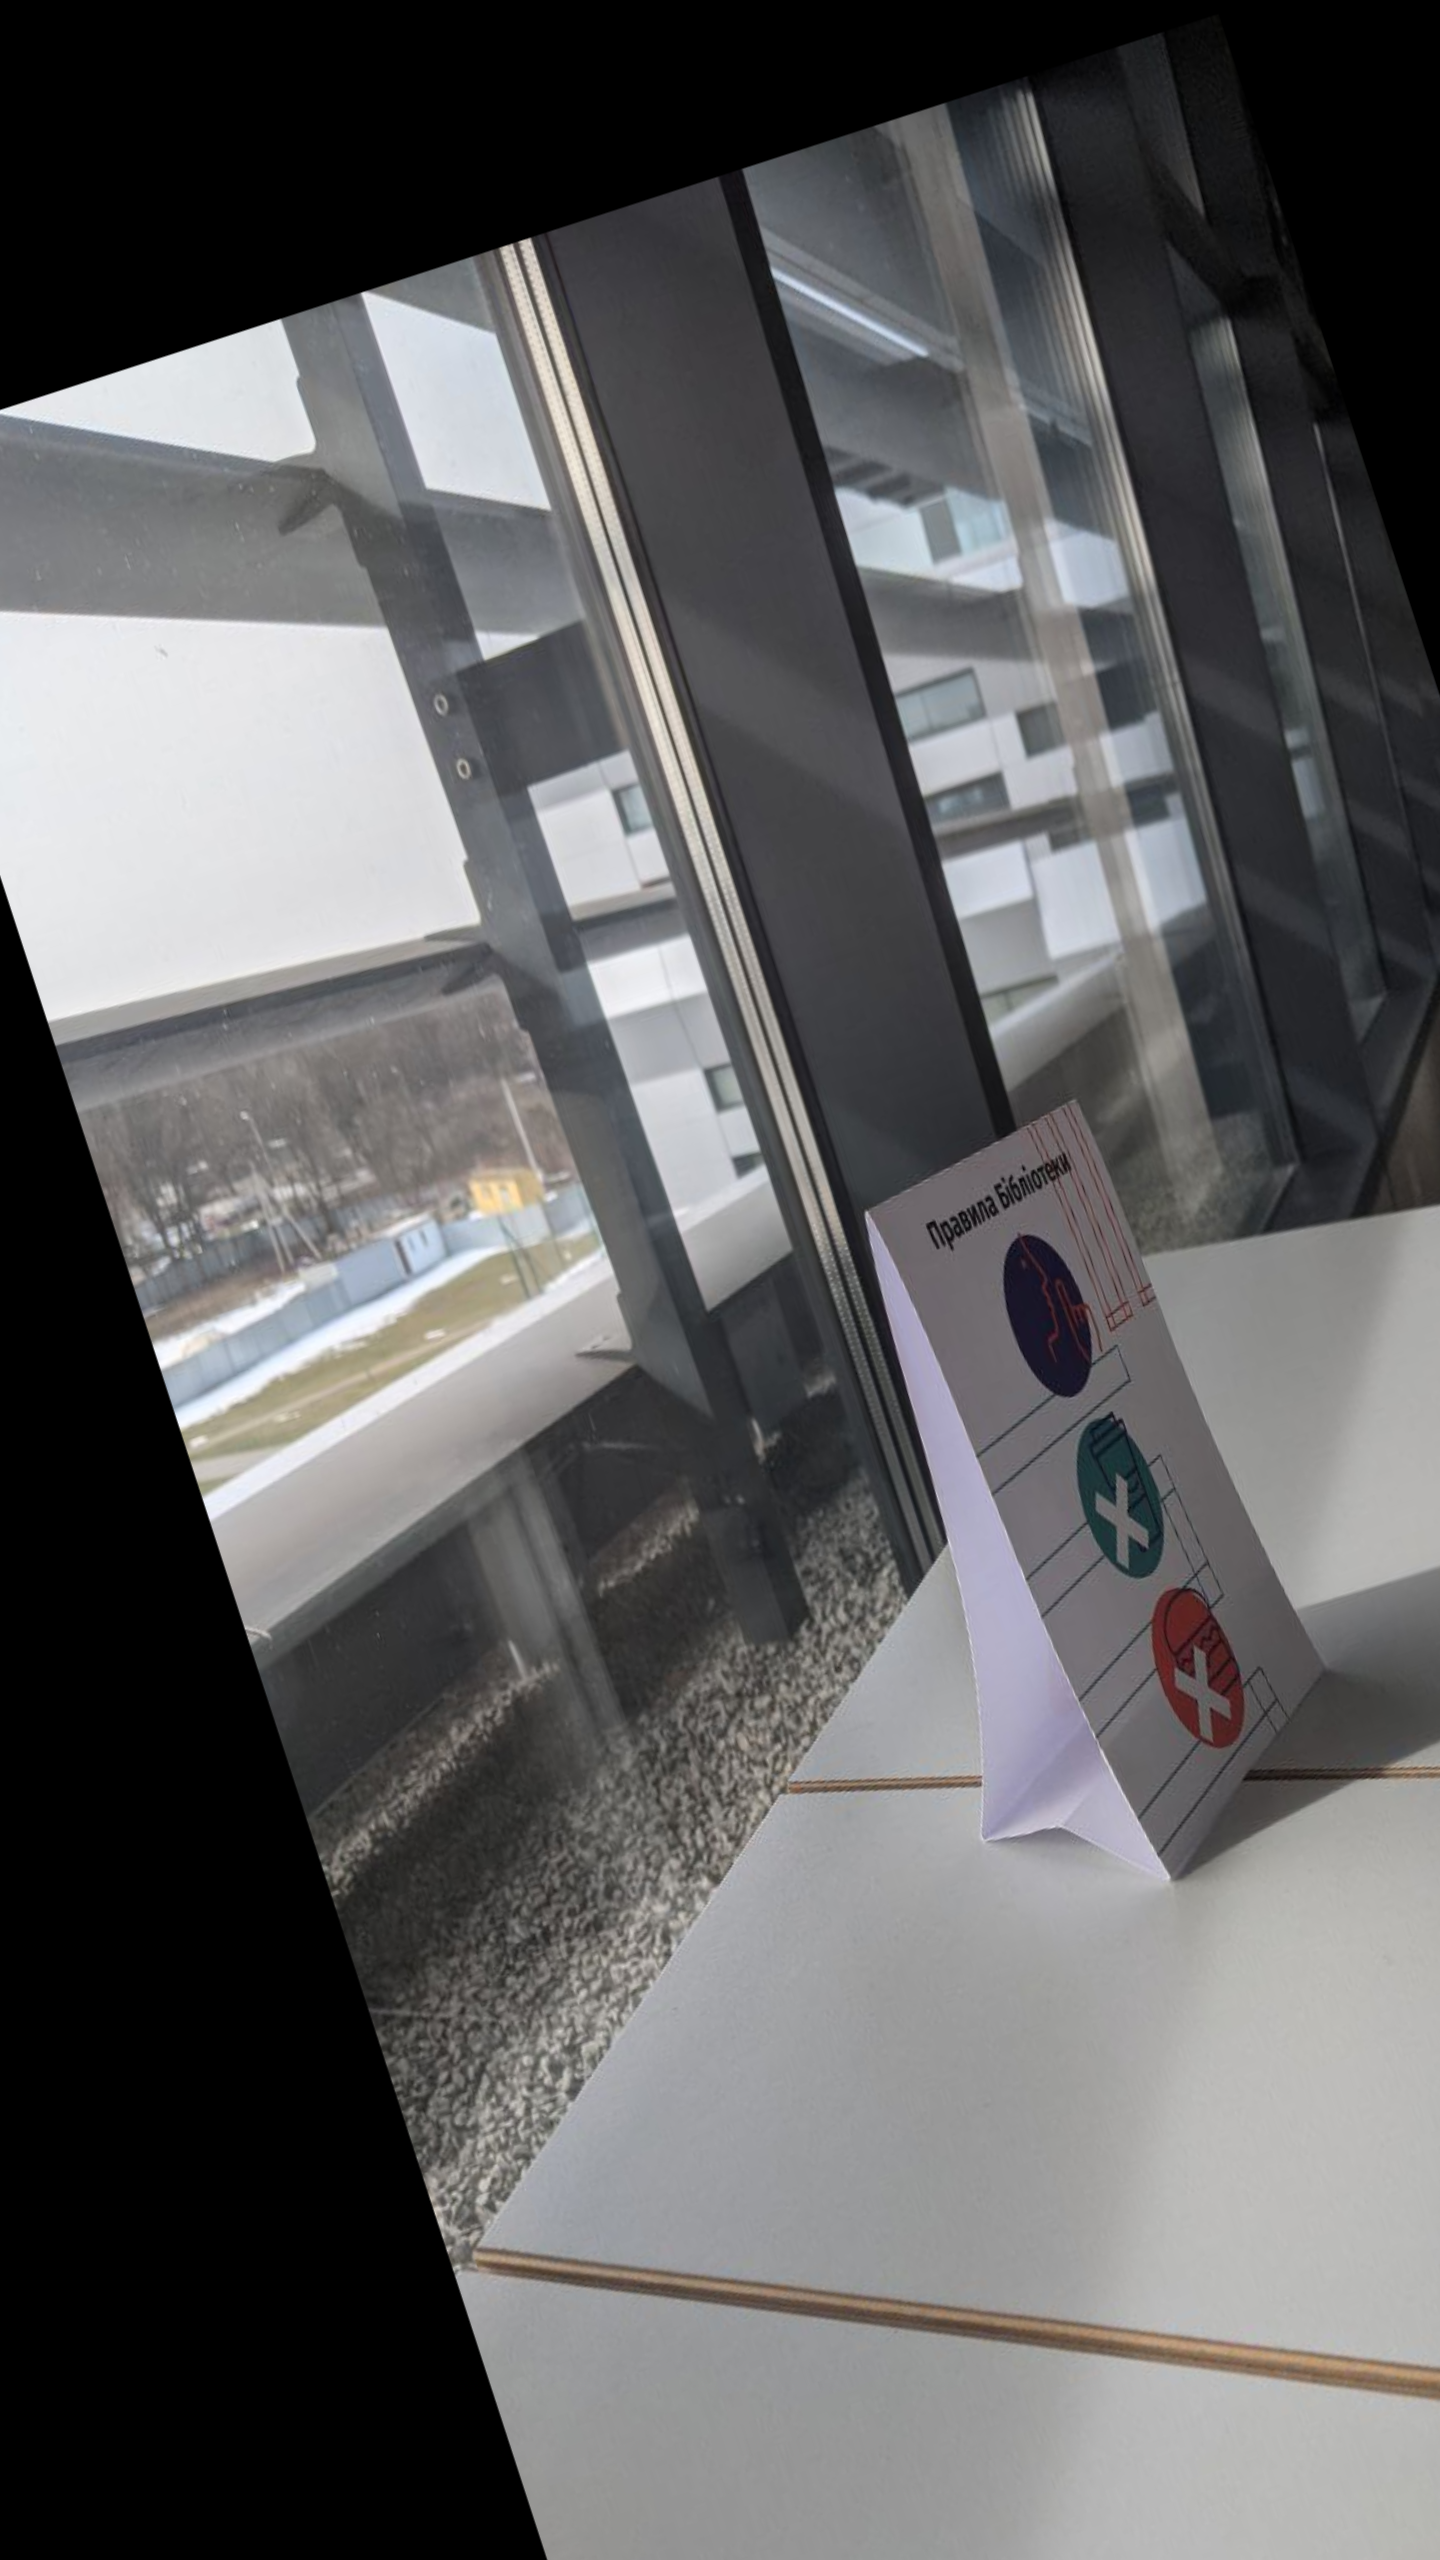

In [ ]:
print("---------------------------")
print("Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)")
print("---------------------------")

##### YOUR CODE STARTS #####
M2 = get_scaling_matrix(1.5, 2)
AFFINE_M2 = np.column_stack((M2, np.array([0, 0]).T))
scaled = cv.warpAffine(image2, AFFINE_M2, (int(image2.shape[1]*1.5), image2.shape[0]*2), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)

angle = 0.3141592653589793
R = get_rotation_matrix(angle)
cx = scaled.shape[0] // 2
cy = scaled.shape[1] // 2

alpha = R[0][0]
beta =  R[1][0]

M = np.array([[ alpha, beta,  (1 - alpha) * cx - beta * cy ],
              [ -beta, alpha, beta * cx + (1 - alpha) * cy ]])

rotated = cv.warpAffine(
    scaled, M, scaled.shape[1::-1], flags = cv.INTER_LINEAR,
    borderMode = cv.BORDER_CONSTANT
  )

T = get_translation_matrix(10, 15)
M = np.float32([ [1, 0, T[0]],
                 [0, 1, T[1]],
                 [0, 0,   1 ] ])
translated = cv.warpPerspective(rotated, M, rotated.shape[1::-1])

cv2_imshow(translated)
##### YOUR CODE ENDS #####

print("---------------------------")
print("Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘")
print("---------------------------")

##### YOUR CODE STARTS #####

T = get_translation_matrix(10, 15)
M = np.float32([ [1, 0, T[0]],
                 [0, 1, T[1]],
                 [0, 0,   1 ] ])
translated = cv.warpPerspective(image2, M, image2.shape[1::-1])

M2 = get_scaling_matrix(1.5, 2)
AFFINE_M2 = np.column_stack((M2, np.array([0, 0]).T))
scaled = cv.warpAffine(
    translated, AFFINE_M2, (int(translated.shape[1]*1.5), translated.shape[0]*2),
    flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT
)

angle = 0.3141592653589793
R = get_rotation_matrix(angle)
cx = scaled.shape[0] // 2
cy = scaled.shape[1] // 2

alpha = R[0][0]
beta =  R[1][0]

M = np.array([[ alpha, beta,  (1 - alpha) * cx - beta * cy ],
              [ -beta, alpha, beta * cx + (1 - alpha) * cy ]])

rotated = cv.warpAffine(
    scaled, M, scaled.shape[1::-1], flags = cv.INTER_LINEAR,
    borderMode = cv.BORDER_CONSTANT
  )

cv2_imshow(rotated)
##### YOUR CODE ENDS #####

Is result the same? Is it possible to obtain same/different result changing the order of transformations? Which conditions should be met?

1) The result is not the same because the translation/rotation stage cuts the image, and, depending on when it occurs, cuts in different places\
2) The results of permutations of transformations shouldn't differ, since the result is basically T3 * T2 * T1 * I, where I is the initial image, and all T's have same dimentions. Hovewer it differs because the image gets cut on the translation and rotation stages.

## Summary

To summarize everything you have learnt in this lab assignment, answer the questions below.

### What is a transformation matrix?

Every linear transformation between $\mathbb{R^n}$ and $\mathbb{R^m}$ amounts to multiplication by the $m \times n$ matrix $A$ called **transformation matrix** such that <center>$T(\textbf{x}) = A\textbf{x}$</center>

### How its shape and values affect the resulting image? What is a shape of a typical transformation matrix that is applied to images, what affects it shape?

`cv2` library uses Affine Transformation to represent the relation between two images. 

To represent affine transformations with matrices, we can use homogeneous coordinates to represent a 2d vector $(x, y)$ as a 3d vector $(x, y, 1)$, and similarly for higher dimensions. 

How its values affect the resulting image:
$\begin{bmatrix} a_1 & b_1 & c_1 \\ a_2 & b_2 & c_2 \\ 0 & 0 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} a_1 x + b_1 y + c_1 \\ a_2 x + b_2 y + c_2 \\ 1 \end{bmatrix}$

So we can rotate the image (clockwise):
$\begin{bmatrix} \cos{\phi} & \sin{\phi} & (1 - \cos{\phi}) \cdot x_с - \sin{\phi} \cdot y_c \\ -\sin{\phi} & \cos{\phi} & \sin{\phi} \cdot x_c + (1 - \cos{\phi}) \cdot y_c \\ 0 & 0 & 1 \end{bmatrix}$

Scale it:
$\begin{bmatrix} x_s & 0 & (1 - x_s)x_c \\ 0 & y_s & (1 - y_s)y_c \\ 0 & 0 & 1 \end{bmatrix}$

Apply horizontal:
$\begin{bmatrix} 1 & \lambda & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$ and vertical: $\begin{bmatrix} 1 & 0 & 0 \\ \lambda & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$ shear

Translate it:
$\begin{bmatrix} 1 & 0 & c_x \\ 0 & 1 & c_y \\ 0 & 0 & 1 \end{bmatrix}$

And mirror it, for example vertically: $\begin{bmatrix} -1 & 0 & 2x_c \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$





### What can be a result of composition of transformations?

The result of composition of transformations is a tranformation that amounts to applying each transformation in turn:
<center>$(T_2 \circ T_1)(\textbf{x}) = T_2(T_1(\textbf{x}))$</center>

If $T_1$ has matrix an $k \times m$ matrix $A$ and $T_2$ has an $n \times k$ matrix $B$, then the matrix of $T_2 \circ T_1$ is $BA$ and is $n \times m$

### What is a perspective shift transformation in terms of geometry?

If we think about photos, all objects are basically an orthogonal projection onto the matrix of the camera. If we assume 2d surfaces, like the library booklet present in the examples, and that the resolution of the photograph is infinite, than no information is being lost by taking a photo. Thus, we can restore, for example, the face look of the booklet.

Speaking more strictly, If a 2d surface A is being projected onto a 2d subspace B of a 3d space, and A is not orthogonal to B, than any point a of A has a unique projection on B. The corresponding projector would than be a biection A->part of B. If we than color each projected point, than no colored point will be lost during projection, and we could stretch the projection until it takes the original form of A.

The "stretch" can be thought of as an artificial rotation of B until it is parallel to the plane to which A belongs. Than the projection of A onto B would take exactly the form of A.